In [1]:
import numpy as np

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

from src.V1_reconst import reconstruct

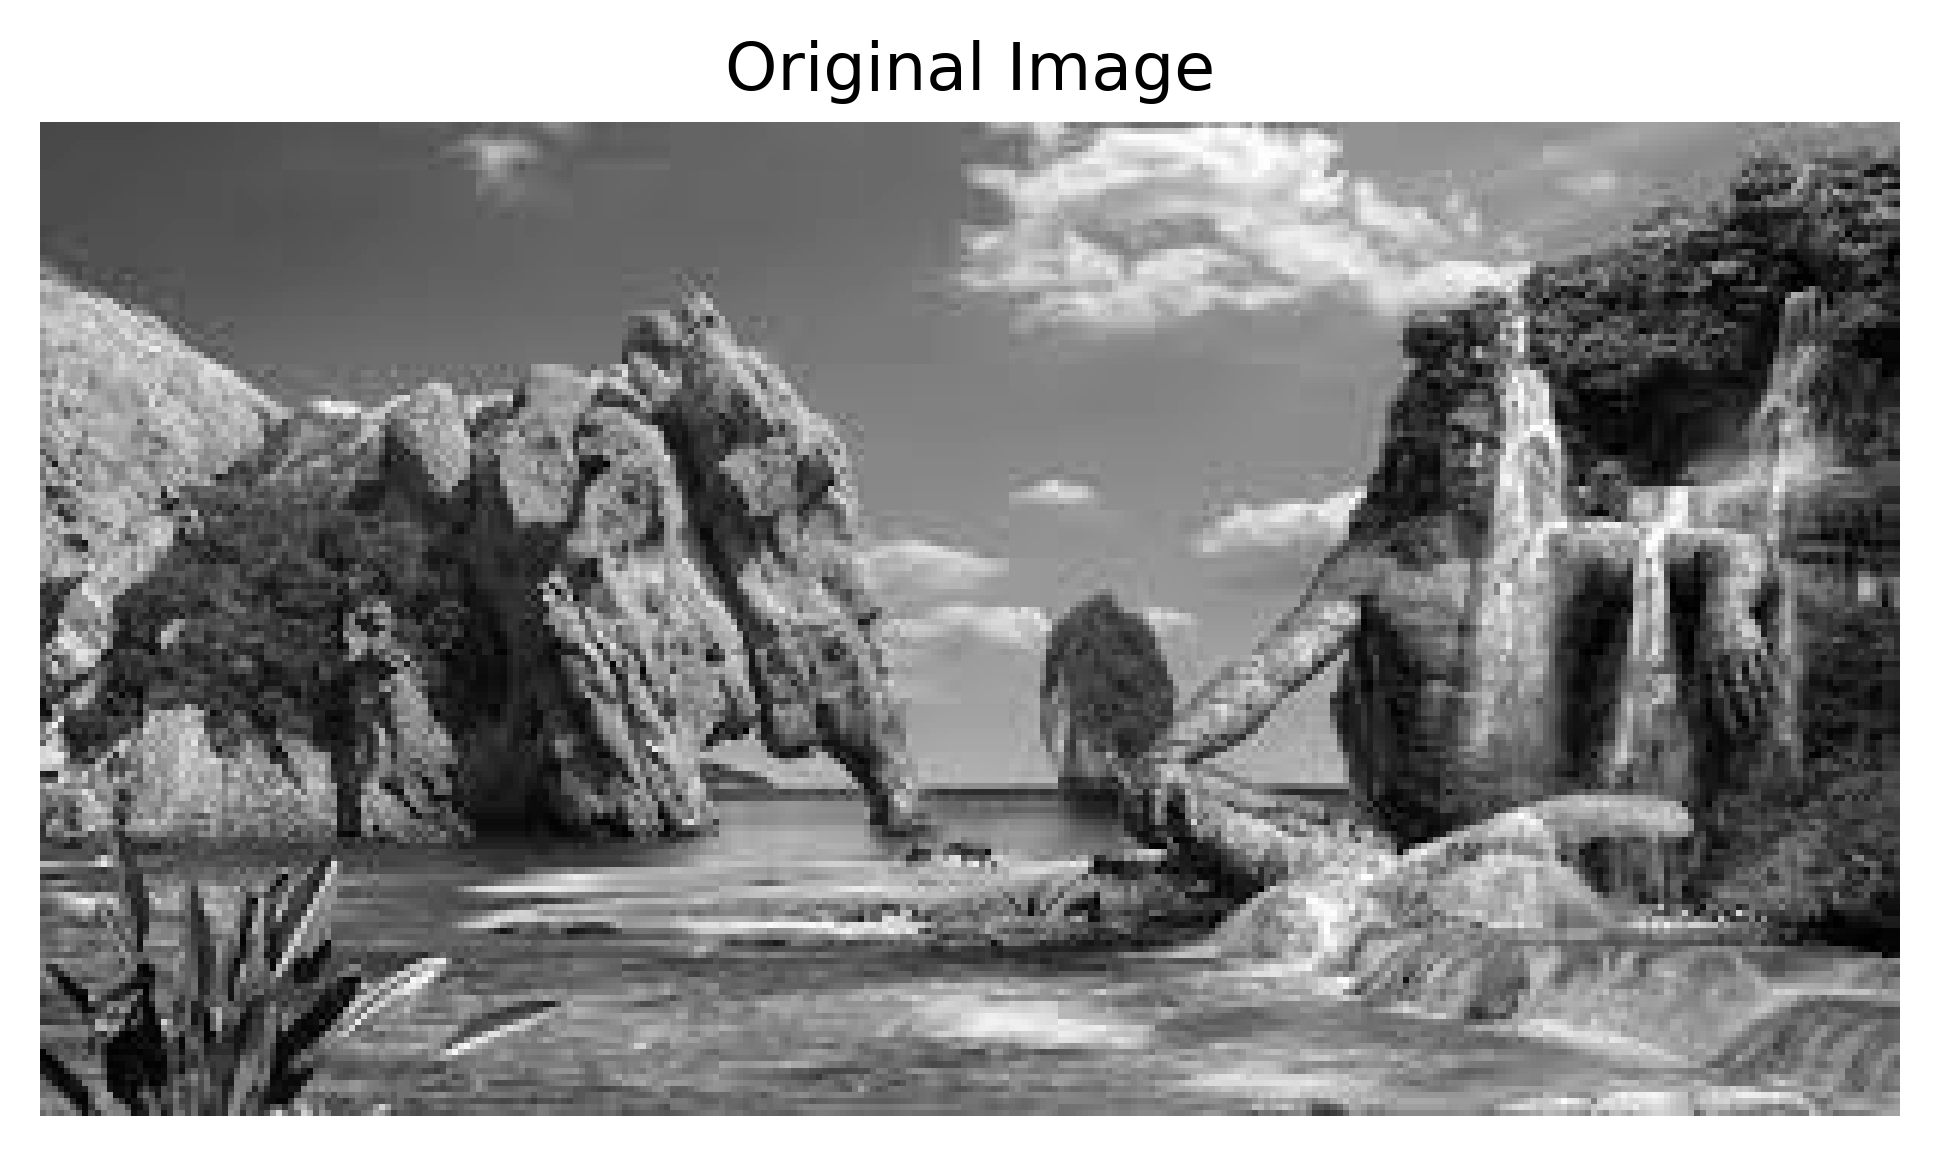

In [67]:
file = 'cliff.jpg'
image_path = 'image/{image}'.format(image = file)
image_nm = file.split('.')[0]

# Read Image in GrayScale and show grayscale image
plt.figure(dpi = 400)
img = Image.open(image_path)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)
plt.imshow(img_arr, 'gray')
plt.title("Original Image")
plt.axis('off')
plt.savefig("result/{img_nm}/Classical/alpha_reconst/Original_image.png".format(img_nm = image_nm), dpi = 1000)
plt.show()

## For one Comparison

32.45324013092736


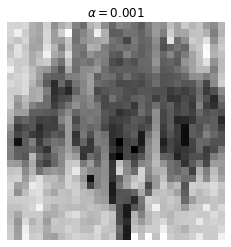

In [52]:
# Genrate y
cn, cm = img_arr.shape
classical_samp = np.floor(cn * cm * 0.5).astype(int)
rand_index = np.random.randint(0, cn * cm, classical_samp)
classical_y = img_arr.flatten()[rand_index].reshape(classical_samp, 1)
alpha = 0.001

# Generate C matrix
classical_y = classical_y * np.sqrt(cn * cm)
C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm)
C3D = C.reshape(classical_samp, cn, cm)
theta, classical_reconst, s = reconstruct(C3D, classical_y, alpha)

error = np.linalg.norm(img_arr - classical_reconst, 'fro') / np.sqrt(cm*cn)
print(error)
plt.imshow(classical_reconst, 'gray')
plt.title("$\\alpha = {alp}$".format(alp = alpha))
plt.axis('off')
plt.clim(0, 255)
plt.show()

In [4]:
classical_reconst

array([[ 67.0229965 ,  69.67050204,  64.06247004, ..., 137.82179466,
        137.12804412, 134.21345912],
       [ 66.89527341,  67.07324734,  59.54223465, ..., 135.01512118,
        133.56011127, 138.42395365],
       [ 62.61069252,  64.33771648,  65.12868639, ..., 137.70956878,
        130.50987388, 126.24432379],
       ...,
       [ 81.4319411 ,  75.32217027,  80.39194011, ..., 128.93942212,
        135.08267145, 146.9869355 ],
       [ 88.91880212,  82.14108796,  76.29142829, ..., 137.92288494,
        139.12922222, 152.75678659],
       [ 89.86067238,  80.96079617,  77.05266796, ..., 140.46601467,
        148.45542161, 157.69815274]])

## For multiple Comparison

In [ ]:
# Genrate 
cn, cm = img_arr.shape
# sample_sz = 0.2
sample_sz = 27971
alpha_list = np.logspace(-4, 3, 8)

for alpha in alpha_list:
#     classical_samp = np.floor(cn * cm * sample_sz).astype(int)
    classical_samp = sample_sz
    rand_index = np.random.randint(0, cn * cm, classical_samp)
    
    classical_y = img_arr.flatten()[rand_index].reshape(classical_samp, 1)

    # Generate C matrix
    classical_y = classical_y * np.sqrt(cn * cm)
    C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm)
    C3D = C.reshape(classical_samp, cn, cm)

    theta, classical_reconst, s = reconstruct(C3D, classical_y, alpha)

    error = np.linalg.norm(img_arr - classical_reconst.astype(int), 'fro') / np.sqrt(cm*cn)
    print(error)
    
    title = "$\\alpha = {alpha}, sample\_size = {sample_sz}, error = {err}$".format(
        alpha = alpha, sample_sz = sample_sz * 100, err = error)
    plt.imshow(classical_reconst.astype(int), 'gray')
    plt.clim(0, 255)
    plt.title("reconst. Image at alpha of {alp}".format(alp = alpha))
    plt.axis('off')
    plt.savefig("result/{img_nm}/Classical/alpha_reconst/alpha_{alp}_sample_{samp}.png".
                        format(img_nm = image_nm, alp = alpha, samp = sample_sz), dpi = 1000)
    plt.show()

In [29]:
img_arr

array([[213, 210, 216, 216, 206, 208, 216, 214, 193, 216, 233, 178, 196,
        141, 117, 134, 176, 112, 167, 160, 186, 213, 190, 177, 203, 182,
        195, 202, 185, 180],
       [220, 206, 204, 208, 208, 214, 215, 204, 228, 227, 203, 159, 174,
        142,  93,  95, 115, 122, 144, 163, 181, 158, 205, 163, 165, 193,
        201, 190, 187, 179],
       [207, 195, 196, 203, 207, 214, 216, 204, 199, 184, 145, 131, 164,
        171, 115, 105,  70, 102, 101, 117, 125,  86, 147, 109, 143, 204,
        196, 176, 195, 194],
       [190, 187, 197, 202, 195, 195, 197, 189, 192, 160, 111,  75, 106,
        124, 100, 101, 108,  96,  96,  93,  93, 100,  99, 117, 146, 189,
        174, 170, 192, 203],
       [198, 194, 200, 202, 190, 180, 169, 152, 183, 172, 167, 112, 129,
        108,  94,  87, 131, 104,  95, 106, 100, 141, 101, 168, 148, 165,
        169, 191, 177, 191],
       [214, 202, 202, 204, 195, 182, 160, 132, 101, 116, 157, 112, 124,
         88,  79,  67,  91, 105,  71, 105, 101, 119,

In [30]:
classical_reconst

array([[113.24811466, 113.24811466, 113.24811466, 113.24811466,
        113.24811466, 113.24811466, 113.24811466, 113.24811466,
        113.24811466, 113.24811466, 113.24811466, 113.24811466,
        113.24811466, 113.24811466, 113.24811466, 113.24811466,
        113.24811466, 113.24811466, 113.24811466, 113.24811466,
        113.24811466, 113.24811466, 113.24811466, 113.24811466,
        113.24811466, 113.24811466, 113.24811466, 113.24811466,
        113.24811466, 113.24811466],
       [112.94254018, 112.94254018, 112.94254018, 112.94254018,
        112.94254018, 112.94254018, 112.94254018, 112.94254018,
        112.94254018, 112.94254018, 112.94254018, 112.94254018,
        112.94254018, 112.94254018, 112.94254018, 112.94254018,
        112.94254018, 112.94254018, 112.94254018, 112.94254018,
        112.94254018, 112.94254018, 112.94254018, 112.94254018,
        112.94254018, 112.94254018, 112.94254018, 112.94254018,
        112.94254018, 112.94254018],
       [112.3447463 , 112.3447

In [11]:
alpha = 3
'{image} image reconstruction with alpha {alp}.png'.format(image = image_nm,
                                                                       alp = alpha).replace(' ', '_')

'tree_part1_image_reconstruction_with_alpha_3.png'

In [27]:
classical_reconst

array([[0.37596825, 0.37596825, 0.37596825, ..., 0.37596825, 0.37596825,
        0.37596825],
       [0.37596825, 0.37596825, 0.37596825, ..., 0.37596825, 0.37596825,
        0.37596825],
       [0.37596825, 0.37596825, 0.37596825, ..., 0.37596825, 0.37596825,
        0.37596825],
       ...,
       [0.37596825, 0.37596825, 0.37596825, ..., 0.37596825, 0.37596825,
        0.37596825],
       [0.37596825, 0.37596825, 0.37596825, ..., 0.37596825, 0.37596825,
        0.37596825],
       [0.37596825, 0.37596825, 0.37596825, ..., 0.37596825, 0.37596825,
        0.37596825]])

In [31]:
213 - 113

100

In [69]:
900 /500

1.8

In [71]:
img_arr.shape

(164, 307)

In [72]:
164 * 307 / 1.8

27971.11111111111